In [554]:
import torch
from torchvision.datasets import CocoDetection

In [555]:
import numpy as np

def transform(x):
    return np.array(x)

def target_transform(x):
    kpt = x[0]['keypoints']
    return [(x, y) for x, y, v in zip(kpt[0::3], kpt[1::3], kpt[2::3])]

dataset = CocoDetection(
    root='needle-student-keypoint-2/train',
    annFile='needle-student-keypoint-2/train/_annotations.coco.json',
    transform=transform,
    target_transform=target_transform,
)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


[(263.951, 988.634), (846.785, 772.08)]


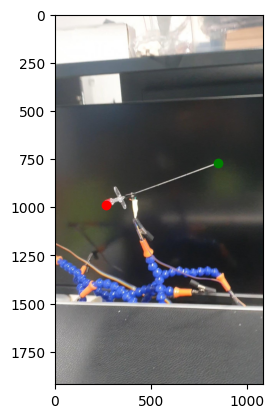

In [558]:
import matplotlib.pyplot as plt
import numpy as np

i = 30
img = np.array(dataset[i][0])
keypoints = dataset[i][1]
print(keypoints)

plt.imshow(img)
plt.scatter(keypoints[0][0], keypoints[0][1], c='r')
plt.scatter(keypoints[1][0], keypoints[1][1], c='g')
plt.show()

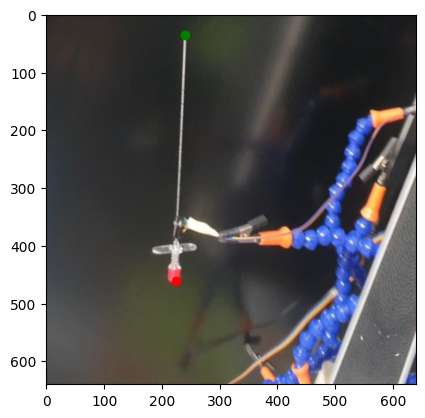

In [582]:
import albumentations as A

transform = A.Compose([
    A.Crop(0, 500, img.shape[1], 1600),
    A.Resize(640, 640),
    A.Rotate(p=1),
    A.RandomResizedCrop(size=(640, 640), scale=(0.7, 1)),
], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

transformed = transform(
    image=img,
    keypoints=keypoints,
)
plt.imshow(transformed['image'])
plt.scatter(transformed['keypoints'][0][0], transformed['keypoints'][0][1], c='r')
plt.scatter(transformed['keypoints'][1][0], transformed['keypoints'][1][1], c='g')
plt.show()